# Pandas
package yang kita gunakan untuk import dan manipulasi data di Python.

Ada dua data struktur pandas: 
- DataFrame (matrix, excel, baris & kolom, 2 dimensi)
- Series (1 dimensi, list, tuple, np array 1 d, punya index dan values)

In [1]:
import numpy as np
import pandas as pd

# untuk visualisasi
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Import data menggunakan Pandas

In [2]:
# import data online vs offline
# dengan cara online, masukkan link ke file nya
# df_nba = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nbaallelo.csv')

In [3]:
# dengan cara offline, download dulu file datanya
df_nba = pd.read_csv('dataset/nbaallelo.csv')

In [4]:
df_nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


# Membaca data Pandas
deskripsi data:
- shape (ada berapa baris, berapa kolom)
- info (setiap kolom tipe datanya apa - numerik, kategori, object (string), datetime (tanggal), ..)
- beberapa baris datanya saja
    - head - brp baris pertama
    - tail - brp baris terakhir
- describe (melihat summary statistik)

In [5]:
# shape
print(df_nba.shape)

(126314, 23)


In [6]:
# info
print(df_nba.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

perhatikan kolom index 5 "date_game" punya tipe data "object" padahal dia adalah sebuah tanggal. Kita bisa ubah tipe data kolom ini menjadi datetime secara manual, bisa juga saat import datanya kita minta opsi parse_dates dinyalakan.

In [7]:
# contoh import ulang dengan opsi parse_dates dinyalakan
df_nba = pd.read_csv('dataset/nbaallelo.csv', parse_dates=True)

# convert datatype
- pd.to_datetime
- pd.Categorical

In [8]:
# kolom date_game kita ubah jadi tipe datetime
df_nba['date_game'] = pd.to_datetime(df_nba['date_game'])

print(df_nba.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  elo_i          126314 non-null  float64       
 12  elo_n          126314 non-null  float64       
 13  win_equiv      126314 non-null  float64       
 14  opp_id         126314 non-null  object        
 15  

In [9]:
# plus poin untuk tipe data datetime, kita bisa ambil langsung detail tanggalnya seperti: year month day hour 
df_nba['date_game'][0].day

1

In [89]:
# tipe data Categorical
df_nba['game_location'] = pd.Categorical(df_nba['game_location'])
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  elo_i          126314 non-null  float64       
 12  elo_n          126314 non-null  float64       
 13  win_equiv      126314 non-null  float64       
 14  opp_id         126314 non-null  object        
 15  

In [90]:
df_nba['game_location'].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

## head dan tail

In [10]:
# head
# secara default akan memperlihatkan 5 baris pertama
df_nba_5 = df_nba.head()
df_nba_5

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [11]:
# secara default akan memperlihatkan 10 baris pertama
df_nba.head(10)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
5,3,194611020DTF,NBA,1,1947,1946-11-02,1,0,WSC,Capitols,...,43.135952,DTF,Falcons,33,1300.0000,1279.6189,A,W,0.359935,NaN
6,4,194611020PRO,NBA,1,1947,1946-11-02,1,0,BOS,Celtics,...,40.459381,PRO,Steamrollers,59,1300.0000,1305.1542,A,L,0.359935,NaN
7,4,194611020PRO,NBA,0,1947,1946-11-02,1,0,PRO,Steamrollers,...,41.540619,BOS,Celtics,53,1300.0000,1294.8458,H,W,0.640065,NaN
8,5,194611020STB,NBA,1,1947,1946-11-02,1,0,PIT,Ironmen,...,40.507980,STB,Bombers,56,1300.0000,1304.6908,A,L,0.359935,NaN
9,5,194611020STB,NBA,0,1947,1946-11-02,1,0,STB,Bombers,...,41.492020,PIT,Ironmen,51,1300.0000,1295.3092,H,W,0.640065,NaN


In [12]:
# tail
# lihat 3 baris terakhir
df_nba.tail(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126311,63156,201506140GSW,NBA,1,2015,2015-06-14,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,2015-06-16,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN
126313,63157,201506170CLE,NBA,1,2015,2015-06-16,103,1,GSW,Warriors,...,68.519516,CLE,Cavaliers,97,1700.7391,1692.0859,A,W,0.518550,NaN


In [13]:
# describe
# rangkuman data secara statistik: mean, count, std, median, min, max, q1, q2, q3
df_nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


# Explorasi data
- value_counts() menghitung setiap data unik di sebuah kolom ada muncul berapa kali
- teknik Query, menggunakan kondisi sebagai index
- teknik .loc dan .iloc:
    - mengambil baris baris tertentu menggunakan index (kolom pertama di pandas DataFrame)
- handling missing values dengan .dropna() dan .fillna()
- mengubah tipe data date menggunakan opsi parse_dates, atau dengan pd.to_datetime

In [14]:
# kolom lg_id ada liga apa saja, bukannya semuanya NBA?
df_nba['lg_id'].value_counts()

NBA    118016
ABA      8298
Name: lg_id, dtype: int64

In [15]:
# tim yang ke record main game siapa saja
df_nba['team_id'].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [16]:
# fran_id tidak harus unik
df_nba['fran_id'].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

In [17]:
# mencari tau team_id mana saja yang nama franchise nya sama sama "Lakers"
# kita mau ambil semua baris data yang fran_id nya "Lakers"
kondisi = df_nba['fran_id'] == "Lakers"
# Query
df_lakers = df_nba[kondisi]
df_lakers['team_id'].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [18]:
# membuat search nya tidak case sensitive
kondisi = df_nba['fran_id'].str.lower() == "LAKERS".lower()
df_nba[kondisi]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1136,569,194811040BLB,NBA,1,1949,1948-11-04,1,0,MNL,Lakers,...,51.218754,BLB,Baltimore,72,1507.2052,1491.9507,A,W,0.386583,NaN
1152,577,194811060WSC,NBA,1,1949,1948-11-06,2,0,MNL,Lakers,...,50.621624,WSC,Capitols,67,1481.8721,1487.9188,A,L,0.443232,NaN
1159,580,194811090BOS,NBA,1,1949,1948-11-09,3,0,MNL,Lakers,...,48.341133,BOS,Celtics,77,1359.3345,1382.0542,A,L,0.608859,NaN
1170,586,194811110NYK,NBA,1,1949,1948-11-11,4,0,MNL,Lakers,...,49.499451,NYK,Knicks,68,1460.4232,1448.9517,A,W,0.432863,NaN
1183,592,194811130PRO,NBA,1,1949,1948-11-13,5,0,MNL,Lakers,...,50.330185,PRO,Steamrollers,67,1245.9456,1237.6326,A,W,0.737010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126016,63009,201504080DEN,NBA,1,2015,2015-04-08,78,0,LAL,Lakers,...,21.921890,DEN,Nuggets,119,1415.0565,1421.3248,A,L,0.238914,NaN
126052,63027,201504100LAL,NBA,0,2015,2015-04-10,79,0,LAL,Lakers,...,22.371969,MIN,Timberwolves,98,1283.9249,1278.4835,H,W,0.670716,NaN
126086,63044,201504120LAL,NBA,0,2015,2015-04-12,80,0,LAL,Lakers,...,21.791288,DAL,Mavericks,120,1556.2162,1563.2498,H,L,0.304769,NaN
126115,63058,201504130SAC,NBA,1,2015,2015-04-13,81,0,LAL,Lakers,...,21.422607,SAC,Kings,102,1395.6000,1400.1278,A,L,0.251263,NaN


In [19]:
# misalnya cari yang string nya contains "ake"
# dengan opsi case sensitive false, tidak case sensitive
kondisi = df_nba['fran_id'].str.contains("AKE", case=False)
df_nba[kondisi]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1136,569,194811040BLB,NBA,1,1949,1948-11-04,1,0,MNL,Lakers,...,51.218754,BLB,Baltimore,72,1507.2052,1491.9507,A,W,0.386583,NaN
1152,577,194811060WSC,NBA,1,1949,1948-11-06,2,0,MNL,Lakers,...,50.621624,WSC,Capitols,67,1481.8721,1487.9188,A,L,0.443232,NaN
1159,580,194811090BOS,NBA,1,1949,1948-11-09,3,0,MNL,Lakers,...,48.341133,BOS,Celtics,77,1359.3345,1382.0542,A,L,0.608859,NaN
1170,586,194811110NYK,NBA,1,1949,1948-11-11,4,0,MNL,Lakers,...,49.499451,NYK,Knicks,68,1460.4232,1448.9517,A,W,0.432863,NaN
1183,592,194811130PRO,NBA,1,1949,1948-11-13,5,0,MNL,Lakers,...,50.330185,PRO,Steamrollers,67,1245.9456,1237.6326,A,W,0.737010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126016,63009,201504080DEN,NBA,1,2015,2015-04-08,78,0,LAL,Lakers,...,21.921890,DEN,Nuggets,119,1415.0565,1421.3248,A,L,0.238914,NaN
126052,63027,201504100LAL,NBA,0,2015,2015-04-10,79,0,LAL,Lakers,...,22.371969,MIN,Timberwolves,98,1283.9249,1278.4835,H,W,0.670716,NaN
126086,63044,201504120LAL,NBA,0,2015,2015-04-12,80,0,LAL,Lakers,...,21.791288,DAL,Mavericks,120,1556.2162,1563.2498,H,L,0.304769,NaN
126115,63058,201504130SAC,NBA,1,2015,2015-04-13,81,0,LAL,Lakers,...,21.422607,SAC,Kings,102,1395.6000,1400.1278,A,L,0.251263,NaN


In [20]:
# Query, kondisi langsung ditaruk sebagai index, tidak jadi variable
# misalnya ak mencari games yang dimainkan di year_id tahun 2000
df_nba[df_nba['year_id']==2000]

# bisa juga dipisah
# kondisi = df_nba['year_id']==2000
# df_nba[kondisi]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
85222,42612,199911020CHH,NBA,0,2000,1999-11-02,1,0,CHH,Pelicans,...,46.869358,ORL,Magic,86,1539.5251,1531.2386,H,W,0.650121,NaN
85223,42612,199911020CHH,NBA,1,2000,1999-11-02,1,0,ORL,Magic,...,44.363525,CHH,Pelicans,100,1547.1558,1555.4423,A,L,0.349879,NaN
85224,42613,199911020DAL,NBA,1,2000,1999-11-02,1,0,GSW,Warriors,...,33.324924,DAL,Mavericks,108,1442.5089,1449.9255,A,L,0.346740,NaN
85225,42613,199911020DAL,NBA,0,2000,1999-11-02,1,0,DAL,Mavericks,...,35.868763,GSW,Warriors,96,1432.4757,1425.0591,H,W,0.653260,NaN
85226,42614,199911020DEN,NBA,1,2000,1999-11-02,1,0,PHO,Suns,...,44.331905,DEN,Nuggets,107,1337.7113,1347.5930,A,L,0.644173,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87745,43873,200006140IND,NBA,1,2000,2000-06-14,103,1,LAL,Lakers,...,60.976109,IND,Pacers,118,1640.2468,1634.7097,A,W,0.444703,NaN
87746,43874,200006160IND,NBA,1,2000,2000-06-16,104,1,LAL,Lakers,...,59.242306,IND,Pacers,120,1634.7097,1655.8340,A,L,0.460496,NaN
87747,43874,200006160IND,NBA,0,2000,2000-06-16,104,1,IND,Pacers,...,56.612629,LAL,Lakers,87,1707.2019,1686.0776,H,W,0.539504,NaN
87748,43875,200006190LAL,NBA,0,2000,2000-06-19,105,1,LAL,Lakers,...,59.584797,IND,Pacers,111,1655.8340,1651.7439,H,W,0.679123,NaN


In [21]:
# Query, ada beberapa kondisi
# misalnya ak mencari games yang dimainkan di year_id tahun 2000, dan team_id BOS
df_nba[(df_nba['year_id']==2000) & (df_nba['team_id']=="BOS")]

# # bisa dipisah
# k1 = (df_nba['year_id']==2000)
# k2 = (df_nba['team_id']=="BOS")
# df_nba[k1 & k2]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
85241,42621,199911020TOR,NBA,1,2000,1999-11-02,1,0,BOS,Celtics,...,39.357250,TOR,Raptors,90,1454.9797,1438.5303,A,W,0.376002,NaN
85249,42625,199911030BOS,NBA,0,2000,1999-11-03,2,0,BOS,Celtics,...,40.024227,WAS,Wizards,101,1452.0154,1445.6503,H,W,0.680592,NaN
85275,42638,199911050BOS,NBA,0,2000,1999-11-05,3,0,BOS,Celtics,...,40.556118,CHH,Pelicans,100,1564.0304,1558.9581,H,W,0.537013,NaN
85298,42650,199911060IND,NBA,1,2000,1999-11-06,4,0,BOS,Celtics,...,40.224617,IND,Pacers,115,1613.9357,1617.0967,A,L,0.220793,NaN
85341,42671,199911100BOS,NBA,0,2000,1999-11-10,5,0,BOS,Celtics,...,38.288498,DET,Pistons,110,1535.6790,1554.1735,H,L,0.579941,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87462,43732,200004120BOS,NBA,0,2000,2000-04-12,78,0,BOS,Celtics,...,34.867908,ORL,Magic,91,1526.2795,1520.1349,H,W,0.511189,NaN
87492,43747,200004140BOS,NBA,0,2000,2000-04-14,79,0,BOS,Celtics,...,35.280464,CHI,Bulls,91,1277.4218,1273.4048,H,W,0.819457,NaN
87524,43763,200004160BOS,NBA,0,2000,2000-04-16,80,0,BOS,Celtics,...,34.759670,CHH,Pelicans,105,1569.9500,1575.0228,H,L,0.463035,NaN
87570,43786,200004180WAS,NBA,1,2000,2000-04-18,81,0,BOS,Celtics,...,38.243484,WAS,Wizards,81,1449.7559,1416.1174,A,W,0.345986,NaN


In [22]:
# kita bisa tarik keluar "tahun" dari kolom date_game dan masukin ke kolom baru
df_nba["tahun"] = df_nba['date_game'].dt.year
df_nba["bulan"] = df_nba['date_game'].dt.month
df_nba["tanggal"] = df_nba['date_game'].dt.day

In [23]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  elo_i          126314 non-null  float64       
 12  elo_n          126314 non-null  float64       
 13  win_equiv      126314 non-null  float64       
 14  opp_id         126314 non-null  object        
 15  

In [24]:
# misalnya ak mencari games yang dimainkan di year_id tahun 2000, dan team_id BOS
df_nba[(df_nba['tahun']==2000) & (df_nba['team_id']=="BOS")]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,tahun,bulan,tanggal
86069,43035,200001030BOS,NBA,0,2000,2000-01-03,29,0,BOS,Celtics,...,98,1419.5936,1415.0808,H,W,0.700174,NaN,2000,1,3
86097,43049,200001040NYK,NBA,1,2000,2000-01-04,30,0,BOS,Celtics,...,96,1572.4579,1576.1995,A,L,0.239186,NaN,2000,1,4
86132,43067,200001070BOS,NBA,0,2000,2000-01-07,31,0,BOS,Celtics,...,93,1520.8965,1513.3167,H,W,0.566950,NaN,2000,1,7
86145,43073,200001080CHI,NBA,1,2000,2000-01-08,32,0,BOS,Celtics,...,96,1290.6854,1310.1476,A,L,0.619390,NaN,2000,1,8
86176,43089,200001100BOS,NBA,0,2000,2000-01-10,33,0,BOS,Celtics,...,112,1318.7360,1337.8719,H,L,0.796530,NaN,2000,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88493,44247,200012210NYK,NBA,1,2001,2000-12-21,26,0,BOS,Celtics,...,86,1513.5945,1499.3473,A,W,0.232016,NaN,2000,12,21
88527,44264,200012230MIL,NBA,1,2001,2000-12-23,27,0,BOS,Celtics,...,104,1530.2087,1532.9749,A,L,0.229597,NaN,2000,12,23
88551,44276,200012260DET,NBA,1,2001,2000-12-26,28,0,BOS,Celtics,...,101,1493.6865,1496.9641,A,L,0.265755,NaN,2000,12,26
88583,44292,200012280NJN,NBA,1,2001,2000-12-28,29,0,BOS,Celtics,...,111,1378.4684,1373.4227,A,W,0.408085,NaN,2000,12,28


## .loc dan .iloc

In [25]:
# mengambil 1 index saja dalam bentuk 1 dimensi, kita akan diberikan Series - tipe data 1 dimensi
df_nba.loc[88493]

gameorder                      44247
game_id                 200012210NYK
lg_id                            NBA
_iscopy                            1
year_id                         2001
date_game        2000-12-21 00:00:00
seasongame                        26
is_playoffs                        0
team_id                          BOS
fran_id                      Celtics
pts                               92
elo_i                      1405.6613
elo_n                      1419.9084
win_equiv                   32.65649
opp_id                           NYK
opp_fran                      Knicks
opp_pts                           86
opp_elo_i                  1513.5945
opp_elo_n                  1499.3473
game_location                      A
game_result                        W
forecast                    0.232016
notes                            NaN
tahun                           2000
bulan                             12
tanggal                           21
Name: 88493, dtype: object

In [26]:
# kalau kita ambil dalam bentuk 2d, kita akan diberikan DataFrame - tipe data 2d
df_nba.loc[[88493]]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,tahun,bulan,tanggal
88493,44247,200012210NYK,NBA,1,2001,2000-12-21,26,0,BOS,Celtics,...,86,1513.5945,1499.3473,A,W,0.232016,NaN,2000,12,21


In [27]:
# kalau kita ambil dalam bentuk 2d, berarti bisa ambil lebih dari 1 index saja
df_nba.loc[88493:89000]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,tahun,bulan,tanggal
88493,44247,200012210NYK,NBA,1,2001,2000-12-21,26,0,BOS,Celtics,...,86,1513.5945,1499.3473,A,W,0.232016,NaN,2000,12,21
88494,44248,200012210ORL,NBA,1,2001,2000-12-21,26,0,CHI,Bulls,...,99,1481.8639,1484.5011,A,L,0.148775,NaN,2000,12,21
88495,44248,200012210ORL,NBA,0,2001,2000-12-21,25,0,ORL,Magic,...,88,1278.8579,1276.2207,H,W,0.851225,NaN,2000,12,21
88496,44249,200012220DAL,NBA,1,2001,2000-12-22,29,0,LAL,Lakers,...,103,1602.5660,1593.4618,A,W,0.392440,NaN,2000,12,22
88497,44249,200012220DAL,NBA,0,2001,2000-12-22,29,0,DAL,Mavericks,...,108,1626.6394,1635.7437,H,L,0.607560,NaN,2000,12,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88996,44499,200101270MIN,NBA,0,2001,2001-01-27,45,0,MIN,Timberwolves,...,80,1657.3287,1644.1320,H,W,0.470361,NaN,2001,1,27
88997,44499,200101270MIN,NBA,1,2001,2001-01-27,46,0,POR,Trailblazers,...,93,1536.7096,1549.9064,A,L,0.529639,NaN,2001,1,27
88998,44500,200101270ORL,NBA,0,2001,2001-01-27,42,0,ORL,Magic,...,81,1583.9869,1601.7188,H,L,0.504939,NaN,2001,1,27
88999,44500,200101270ORL,NBA,1,2001,2001-01-27,45,0,MIA,Heat,...,59,1487.4187,1469.6869,A,W,0.495061,NaN,2001,1,27


In [28]:
df_nba.loc[[88493,10000]]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,tahun,bulan,tanggal
88493,44247,200012210NYK,NBA,1,2001,2000-12-21,26,0,BOS,Celtics,...,86,1513.5945,1499.3473,A,W,0.232016,NaN,2000,12,21
10000,5001,196012290DET,NBA,0,1961,1960-12-29,32,0,DET,Pistons,...,89,1605.9410,1580.8806,H,W,0.361383,NaN,1960,12,29


In [29]:
# bisa juga ambil kolom2 tertentu
df_nba.loc[[88493, 100000], ['team_id', 'fran_id']]

,team_id,fran_id
88493,BOS,Celtics
100000,PHO,Suns


In [30]:
df_nba.loc[80000:80010, ['team_id', 'opp_id','pts', 'opp_pts']]

,team_id,opp_id,pts,opp_pts
80000,MIA,IND,106,90
80001,IND,MIA,90,106
80002,NYK,PHI,107,92
80003,PHI,NYK,92,107
80004,SAC,LAC,105,98
80005,LAC,SAC,98,105
80006,POR,UTA,86,110
80007,UTA,POR,110,86
80008,CHI,ATL,89,88
80009,ATL,CHI,88,89


In [31]:
# iloc untuk index juga tapi indexnya angka urut
# kolom ke berapa dan baris ke berapa dalam bentuk posisi index (0,1,2,3,..)
df_nba.iloc[80000:80010, [5, 8]]

,date_game,team_id
80000,1997-02-13,MIA
80001,1997-02-13,IND
80002,1997-02-13,NYK
80003,1997-02-13,PHI
80004,1997-02-13,SAC
80005,1997-02-13,LAC
80006,1997-02-13,POR
80007,1997-02-13,UTA
80008,1997-02-14,CHI
80009,1997-02-14,ATL


## Aggregate
min, max, count, sum, median, mean, std, dan lainnya

In [32]:
# misalnya kita mau cari tim MNL game paling awal, dan paling akhir
df_mnl = df_nba[df_nba['team_id']=='MNL']
print("game pertama:", df_mnl['date_game'].min())
print("game terakhir:", df_mnl['date_game'].max())

game pertama: 1948-11-04 00:00:00
game terakhir: 1960-03-26 00:00:00


In [33]:
df_mnl['date_game'].agg(['min', 'max'])

min   1948-11-04
max   1960-03-26
Name: date_game, dtype: datetime64[ns]

In [34]:
# tim MNL rata rata skor berapa poin per game, min, max, median pts per game berapa?
df_mnl['pts'].agg(['mean', 'min', 'median', 'max'])

mean       93.265328
min        18.000000
median     93.000000
max       139.000000
Name: pts, dtype: float64

## Handle missing values
value yang NaN bisa membuat error, atau salah kalkulasi, jadi kita hindari.
1. bisa dihapus, pakai dropna()
2. bisa diisi, pakai fillna()

In [35]:
# contoh, untuk notes, kalau kita drop
nba_dropped = df_nba.dropna() # secara default, axis=0, yang di drop adalah baris data
nba_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 930 to 124863
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   gameorder      5424 non-null   int64         
 1   game_id        5424 non-null   object        
 2   lg_id          5424 non-null   object        
 3   _iscopy        5424 non-null   int64         
 4   year_id        5424 non-null   int64         
 5   date_game      5424 non-null   datetime64[ns]
 6   seasongame     5424 non-null   int64         
 7   is_playoffs    5424 non-null   int64         
 8   team_id        5424 non-null   object        
 9   fran_id        5424 non-null   object        
 10  pts            5424 non-null   int64         
 11  elo_i          5424 non-null   float64       
 12  elo_n          5424 non-null   float64       
 13  win_equiv      5424 non-null   float64       
 14  opp_id         5424 non-null   object        
 15  opp_fran       54

In [36]:
# bisa juga kita berikan opsi axis=1, yang di drop adalah kolom data
nba_dropped = df_nba.dropna(axis=1)
nba_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  elo_i          126314 non-null  float64       
 12  elo_n          126314 non-null  float64       
 13  win_equiv      126314 non-null  float64       
 14  opp_id         126314 non-null  object        
 15  

In [37]:
# kan sayang, padahal hanya karena notes nya tidak aada
# jadi, kita bisa "isi" saja notes nya dengan "no notes"
df_nba['notes'] = df_nba['notes'].fillna("no notes")
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  elo_i          126314 non-null  float64       
 12  elo_n          126314 non-null  float64       
 13  win_equiv      126314 non-null  float64       
 14  opp_id         126314 non-null  object        
 15  

In [38]:
df_nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,tahun,bulan,tanggal
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,...,68,1300.0000,1306.7233,H,L,0.640065,no notes,1946,11,1
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,...,66,1300.0000,1293.2767,A,W,0.359935,no notes,1946,11,1
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,...,47,1306.7233,1297.0712,H,W,0.631101,no notes,1946,11,2
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,...,63,1300.0000,1309.6521,A,L,0.368899,no notes,1946,11,2
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,...,50,1300.0000,1320.3811,H,L,0.640065,no notes,1946,11,2


## Invalid Values
data tidak missing (bukan NaN) tapi tidak masuk akal

contoh: pts 0 di sebuah game basket NBA

In [93]:
df_nba[df_nba['pts']==0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,tahun,bulan,tanggal
26684,13343,197210260VIR,ABA,1,1973,1972-10-26,7,0,DNR,Nuggets,...,2,1484.1907,1487.083,A,L,0.328948,at Richmond VA; forfeit to VIR,1972,10,26


In [98]:
df_nba[df_nba['pts']==2]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,tahun,bulan,tanggal
26685,13343,197210260VIR,ABA,0,1973,1972-10-26,8,0,VIR,Squires,...,0,1460.3387,1457.4464,H,W,0.671052,at Richmond VA; forfeit to VIR,1972,10,26


In [99]:
# kita bisa hapus baris ini
nba_dropped = df_nba.drop([26684, 26685])
nba_dropped.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast,tahun,bulan,tanggal
count,126312.000000,126312.000000,126312.000000,126312.000000,126312.000000,126312.000000,126312.000000,126312.000000,126312.000000,126312.000000,126312.000000,126312.000000,126312.000000,126312.000000,126312.000000,126312.000000
mean,31579.288745,0.500000,1988.200614,43.534304,0.063858,102.731593,1495.236419,1495.236419,41.707885,102.731593,1495.236419,1495.236419,0.500000,1987.845066,5.643945,15.480667
std,18231.927576,0.500002,17.582345,25.374974,0.244500,14.809430,112.140786,112.462525,10.627414,14.809430,112.140786,112.462525,0.215253,17.622529,4.381786,8.756442
min,1.000000,0.000000,1947.000000,1.000000,0.000000,18.000000,1091.644500,1085.774400,10.152501,18.000000,1091.644500,1085.774400,0.020447,1946.000000,1.000000,1.000000
25%,15790.750000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237300,1416.992075,34.102655,93.000000,1417.237300,1416.992075,0.327986,1974.000000,2.000000,8.000000
50%,31579.500000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.947600,1500.958000,42.113357,103.000000,1500.947600,1500.958000,0.500000,1990.000000,3.000000,15.000000
75%,47368.250000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060950,1576.292150,49.635576,112.000000,1576.060950,1576.292150,0.672014,2003.000000,11.000000,23.000000
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553,2015.000000,12.000000,31.000000


In [100]:
nba_dropped[nba_dropped['pts']==18]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,tahun,bulan,tanggal
3190,1596,195011220LAL,NBA,0,1951,1950-11-22,10,0,MNL,Lakers,...,19,1487.9486,1496.4873,H,L,0.826804,no notes,1950,11,22


# Struktur data Series
Series adalah tipe data 1d dari Pandas

In [39]:
list_buah = ["apel", "jeruk", "pisang"]
pd.Series(list_buah)

0      apel
1     jeruk
2    pisang
dtype: object

In [40]:
buah = {"nama": "apel", "harga": 5400, "warna":"merah"}
pd.Series(buah)

nama      apel
harga     5400
warna    merah
dtype: object

In [41]:
list_buah = ["apel", "jeruk", "pisang"]
pd.Series(list_buah, index=["A", "B", "C"])

A      apel
B     jeruk
C    pisang
dtype: object

In [44]:
# membuat series revenue kota
city_rev = pd.Series(index=["Amsterdam", "Tokyo", "Jakarta"], data=[5250, 6750, 8100])
city_rev

Amsterdam    5250
Tokyo        6750
Jakarta      8100
dtype: int64

In [45]:
# membuat series populasi kota
city_pop = pd.Series({"Jakarta":5200, "Amsterdam":1100})
city_pop

Jakarta      5200
Amsterdam    1100
dtype: int64

In [46]:
# membaca Series
city_rev.keys()

Index(['Amsterdam', 'Tokyo', 'Jakarta'], dtype='object')

In [47]:
city_rev.index

Index(['Amsterdam', 'Tokyo', 'Jakarta'], dtype='object')

In [48]:
city_rev.values

array([5250, 6750, 8100], dtype=int64)

# Struktur data DataFrame
DataFrame adalah struktur data 2 dimensi milik Pandas

In [50]:
# kita bisa gabungkan 2 series tadi jadi 1 dataframe
df_kota = pd.DataFrame({"revenue":city_rev, "populasi":city_pop})
df_kota

,revenue,populasi
Amsterdam,5250,1100.0
Jakarta,8100,5200.0
Tokyo,6750,NaN


In [51]:
# bisa kita baca
df_kota.keys() # keys adalah nama kolom

Index(['revenue', 'populasi'], dtype='object')

In [52]:
df_kota.index

Index(['Amsterdam', 'Jakarta', 'Tokyo'], dtype='object')

In [53]:
df_kota.columns

Index(['revenue', 'populasi'], dtype='object')

In [54]:
df_kota.values # adalah sebuah np array 2 dimensi

array([[5250., 1100.],
       [8100., 5200.],
       [6750.,   nan]])

In [55]:
df_kota.axes # index dan columns

[Index(['Amsterdam', 'Jakarta', 'Tokyo'], dtype='object'),
 Index(['revenue', 'populasi'], dtype='object')]

In [61]:
# ambil Amsterdam dan revenue
df_kota.loc['Amsterdam', 'revenue'] # sebuah value
# df_kota.loc[['Amsterdam'], 'revenue'] # sebuah Series
# df_kota.loc[['Amsterdam'], ['revenue']] # sebuah DataFrame

5250

In [66]:
# dengan iloc
df_kota.iloc[0, 0] # satu value
# df_kota.iloc[[0], 0] # Series
# df_kota.iloc[[0], [0]] # DataFrame

,revenue
Amsterdam,5250


In [68]:
# mangambil 1 kolom dari sebuah dataframe - dua cara:
# df_kota['revenue']
df_kota.revenue

Amsterdam    5250
Jakarta      8100
Tokyo        6750
Name: revenue, dtype: int64

## Combine DataFrame

In [69]:
rev2 = pd.Series(data=[6210, 7410], index=["Bali", 'Singapore'])
pop2 = pd.Series(data=[2015, 581], index=["Bali", 'Singapore'])

df_kota2 = pd.DataFrame({"revenue":rev2, "populasi":pop2})
df_kota2

,revenue,populasi
Bali,6210,2015
Singapore,7410,581


In [70]:
df_kota

,revenue,populasi
Amsterdam,5250,1100.0
Jakarta,8100,5200.0
Tokyo,6750,NaN


In [73]:
# concat
df_kota_all = pd.concat([df_kota, df_kota2])
df_kota_all

,revenue,populasi
Amsterdam,5250,1100.0
Jakarta,8100,5200.0
Tokyo,6750,NaN
Bali,6210,2015.0
Singapore,7410,581.0


In [74]:
df_kota_negara = pd.DataFrame({"negara":["Holland", "Indonesia", "Jepang", "Indonesia"],
                              "capital":["Yes", "Yes", "Yes", "No"]},
                              index=["Amsterdam", "Jakarta", "Tokyo", "Bali"])
df_kota_negara

,negara,capital
Amsterdam,Holland,Yes
Jakarta,Indonesia,Yes
Tokyo,Jepang,Yes
Bali,Indonesia,No


In [76]:
# concat
pd.concat([df_kota_all, df_kota_negara], axis=1)

,revenue,populasi,negara,capital
Amsterdam,5250,1100.0,Holland,Yes
Jakarta,8100,5200.0,Indonesia,Yes
Tokyo,6750,NaN,Jepang,Yes
Bali,6210,2015.0,Indonesia,No
Singapore,7410,581.0,NaN,NaN


In [77]:
pd.concat([df_kota_all, df_kota_negara], axis=1, join="inner")

,revenue,populasi,negara,capital
Amsterdam,5250,1100.0,Holland,Yes
Jakarta,8100,5200.0,Indonesia,Yes
Tokyo,6750,NaN,Jepang,Yes
Bali,6210,2015.0,Indonesia,No


In [80]:
df_gabung = pd.concat([df_kota_negara, df_kota_all], axis=1, join="inner")
df_gabung

,negara,capital,revenue,populasi
Amsterdam,Holland,Yes,5250,1100.0
Jakarta,Indonesia,Yes,8100,5200.0
Tokyo,Jepang,Yes,6750,NaN
Bali,Indonesia,No,6210,2015.0


In [82]:
# bagaimana kalau dataframe yang mau digabung tidak punya index yang sama
df_negara=pd.DataFrame({"pop_negara": [50000, 125000]}, index=["Holland", "Indonesia"])
df_negara

,pop_negara
Holland,50000
Indonesia,125000


In [86]:
# merge
pd.merge(df_gabung, df_negara, left_on="negara", right_index=True)

,negara,capital,revenue,populasi,pop_negara
Amsterdam,Holland,Yes,5250,1100.0,50000
Jakarta,Indonesia,Yes,8100,5200.0,125000
Bali,Indonesia,No,6210,2015.0,125000


# DataFrame Columns
- kolom dataframe bisa kita hapus
- bisa kita rename juga
- set_index untuk membuat data 1 kolom menjadi index
- reset_indes untuk membuat data index menjadi 1 kolom biasa

In [102]:
df_nba.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes',
       'tahun', 'bulan', 'tanggal'],
      dtype='object')

In [103]:
# keep columns
df_nba[['gameorder', 'game_id', '_iscopy', 'date_game',
       'team_id', 'fran_id', 'pts', 'opp_id', 'opp_fran', 'opp_pts', 'game_location', 'game_result', 'notes',
       'tahun', 'bulan', 'tanggal']]

,gameorder,game_id,_iscopy,date_game,team_id,fran_id,pts,opp_id,opp_fran,opp_pts,game_location,game_result,notes,tahun,bulan,tanggal
0,1,194611010TRH,0,1946-11-01,TRH,Huskies,66,NYK,Knicks,68,H,L,no notes,1946,11,1
1,1,194611010TRH,1,1946-11-01,NYK,Knicks,68,TRH,Huskies,66,A,W,no notes,1946,11,1
2,2,194611020CHS,0,1946-11-02,CHS,Stags,63,NYK,Knicks,47,H,W,no notes,1946,11,2
3,2,194611020CHS,1,1946-11-02,NYK,Knicks,47,CHS,Stags,63,A,L,no notes,1946,11,2
4,3,194611020DTF,0,1946-11-02,DTF,Falcons,33,WSC,Capitols,50,H,L,no notes,1946,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,0,2015-06-11,CLE,Cavaliers,82,GSW,Warriors,103,H,L,no notes,2015,6,11
126310,63156,201506140GSW,0,2015-06-14,GSW,Warriors,104,CLE,Cavaliers,91,H,W,no notes,2015,6,14
126311,63156,201506140GSW,1,2015-06-14,CLE,Cavaliers,91,GSW,Warriors,104,A,L,no notes,2015,6,14
126312,63157,201506170CLE,0,2015-06-16,CLE,Cavaliers,97,GSW,Warriors,105,H,L,no notes,2015,6,16


In [106]:
# kolom yang kita tidak rencana akan gunakan, bisa kita hapus
df_nba = df_nba.drop(columns=['lg_id', 'year_id',
       'seasongame', 'is_playoffs', 'elo_i',
       'elo_n', 'win_equiv',  'opp_elo_i',
       'opp_elo_n',  'forecast', ])

# df_nba.drop(columns=['lg_id', 'year_id',
#        'seasongame', 'is_playoffs', 'elo_i',
#        'elo_n', 'win_equiv',  'opp_elo_i',
#        'opp_elo_n',  'forecast', ], inplace=True)

In [107]:
df_nba

,gameorder,game_id,_iscopy,date_game,team_id,fran_id,pts,opp_id,opp_fran,opp_pts,game_location,game_result,notes,tahun,bulan,tanggal
0,1,194611010TRH,0,1946-11-01,TRH,Huskies,66,NYK,Knicks,68,H,L,no notes,1946,11,1
1,1,194611010TRH,1,1946-11-01,NYK,Knicks,68,TRH,Huskies,66,A,W,no notes,1946,11,1
2,2,194611020CHS,0,1946-11-02,CHS,Stags,63,NYK,Knicks,47,H,W,no notes,1946,11,2
3,2,194611020CHS,1,1946-11-02,NYK,Knicks,47,CHS,Stags,63,A,L,no notes,1946,11,2
4,3,194611020DTF,0,1946-11-02,DTF,Falcons,33,WSC,Capitols,50,H,L,no notes,1946,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,0,2015-06-11,CLE,Cavaliers,82,GSW,Warriors,103,H,L,no notes,2015,6,11
126310,63156,201506140GSW,0,2015-06-14,GSW,Warriors,104,CLE,Cavaliers,91,H,W,no notes,2015,6,14
126311,63156,201506140GSW,1,2015-06-14,CLE,Cavaliers,91,GSW,Warriors,104,A,L,no notes,2015,6,14
126312,63157,201506170CLE,0,2015-06-16,CLE,Cavaliers,97,GSW,Warriors,105,H,L,no notes,2015,6,16


In [110]:
# bisa ganti nama kolom
df_nba.rename(columns={"game_id":"id", "date_game":"date", "game_location":"loc", "game_result":"result"}, inplace=True)

In [111]:
df_nba

,gameorder,id,_iscopy,date,team_id,fran_id,pts,opp_id,opp_fran,opp_pts,loc,result,notes,tahun,bulan,tanggal
0,1,194611010TRH,0,1946-11-01,TRH,Huskies,66,NYK,Knicks,68,H,L,no notes,1946,11,1
1,1,194611010TRH,1,1946-11-01,NYK,Knicks,68,TRH,Huskies,66,A,W,no notes,1946,11,1
2,2,194611020CHS,0,1946-11-02,CHS,Stags,63,NYK,Knicks,47,H,W,no notes,1946,11,2
3,2,194611020CHS,1,1946-11-02,NYK,Knicks,47,CHS,Stags,63,A,L,no notes,1946,11,2
4,3,194611020DTF,0,1946-11-02,DTF,Falcons,33,WSC,Capitols,50,H,L,no notes,1946,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,0,2015-06-11,CLE,Cavaliers,82,GSW,Warriors,103,H,L,no notes,2015,6,11
126310,63156,201506140GSW,0,2015-06-14,GSW,Warriors,104,CLE,Cavaliers,91,H,W,no notes,2015,6,14
126311,63156,201506140GSW,1,2015-06-14,CLE,Cavaliers,91,GSW,Warriors,104,A,L,no notes,2015,6,14
126312,63157,201506170CLE,0,2015-06-16,CLE,Cavaliers,97,GSW,Warriors,105,H,L,no notes,2015,6,16


In [112]:
df_kota_all

,revenue,populasi
Amsterdam,5250,1100.0
Jakarta,8100,5200.0
Tokyo,6750,NaN
Bali,6210,2015.0
Singapore,7410,581.0


In [113]:
# ganti nama semua kolom
df_kota_all.columns = ["Revenue", "Populasi"]

In [114]:
df_kota_all

,Revenue,Populasi
Amsterdam,5250,1100.0
Jakarta,8100,5200.0
Tokyo,6750,NaN
Bali,6210,2015.0
Singapore,7410,581.0


In [117]:
# reset_index
df_kota_all.reset_index(inplace=True)

In [118]:
df_kota_all

,index,Revenue,Populasi
0,Amsterdam,5250,1100.0
1,Jakarta,8100,5200.0
2,Tokyo,6750,NaN
3,Bali,6210,2015.0
4,Singapore,7410,581.0


In [120]:
df_kota_all.rename(columns={"index":"City"}, inplace=True)

In [122]:
df_kota_all

,City,Revenue,Populasi
0,Amsterdam,5250,1100.0
1,Jakarta,8100,5200.0
2,Tokyo,6750,NaN
3,Bali,6210,2015.0
4,Singapore,7410,581.0


In [124]:
# set index lagi
df_kota_all = df_kota_all.set_index("City")

In [126]:
df_kota_all

,Revenue,Populasi
City,,
Amsterdam,5250,1100.0
Jakarta,8100,5200.0
Tokyo,6750,NaN
Bali,6210,2015.0
Singapore,7410,581.0


## Edit banyak nama kolom sekaligus

In [131]:
df = pd.read_csv('dataset/nbaallelo.csv')
cols = df.columns
cols

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

In [136]:
new_cols = cols.str.replace('game_', '')
new_cols = new_cols.str.replace('_game', '')
new_cols = new_cols.str.replace('game', '')
new_cols

Index(['order', 'id', 'lg_id', '_iscopy', 'year_id', 'date', 'season',
       'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i', 'elo_n',
       'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i', 'opp_elo_n',
       'location', 'result', 'forecast', 'notes'],
      dtype='object')

In [138]:
df.columns = new_cols

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order        126314 non-null  int64  
 1   id           126314 non-null  object 
 2   lg_id        126314 non-null  object 
 3   _iscopy      126314 non-null  int64  
 4   year_id      126314 non-null  int64  
 5   date         126314 non-null  object 
 6   season       126314 non-null  int64  
 7   is_playoffs  126314 non-null  int64  
 8   team_id      126314 non-null  object 
 9   fran_id      126314 non-null  object 
 10  pts          126314 non-null  int64  
 11  elo_i        126314 non-null  float64
 12  elo_n        126314 non-null  float64
 13  win_equiv    126314 non-null  float64
 14  opp_id       126314 non-null  object 
 15  opp_fran     126314 non-null  object 
 16  opp_pts      126314 non-null  int64  
 17  opp_elo_i    126314 non-null  float64
 18  opp_elo_n    126314 non-

In [140]:
df = pd.read_csv('dataset/nbaallelo.csv')
cols = df.columns
cols

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

In [151]:
# biar tidak case sensitive
new_cols = cols.str.lower()
new_cols = new_cols.str.replace('game_','')
new_cols = new_cols.str.replace('_game','')
new_cols = new_cols.str.replace('game','')
new_cols = new_cols.str.replace('_id','')
# bisa convert ke title case
new_cols = new_cols.str.title()
new_cols

Index(['Order', 'Id', 'Lg', '_Iscopy', 'Year', 'Date', 'Season', 'Is_Playoffs',
       'Team', 'Fran', 'Pts', 'Elo_I', 'Elo_N', 'Win_Equiv', 'Opp', 'Opp_Fran',
       'Opp_Pts', 'Opp_Elo_I', 'Opp_Elo_N', 'Location', 'Result', 'Forecast',
       'Notes'],
      dtype='object')

# groupby
case 1: cari data game tim Knicks di tahun 2000-2010, hitung rata rata pts yang mereka dapatkan per tahun

In [153]:
kondisi1 = df_nba['tahun'] >= 2000
kondisi2 = df_nba['tahun'] <= 2010
kondisi3 = df_nba['fran_id'] == "Knicks"

df_knicks_2000_10 = df_nba[kondisi1 & kondisi2 & kondisi3]
df_knicks_2000_10

,gameorder,id,_iscopy,date,team_id,fran_id,pts,opp_id,opp_fran,opp_pts,loc,result,notes,tahun,bulan,tanggal
86096,43049,200001040NYK,0,2000-01-04,NYK,Knicks,96,BOS,Celtics,88,H,W,no notes,2000,1,4
86138,43070,200001070ORL,1,2000-01-07,NYK,Knicks,94,ORL,Magic,86,A,W,no notes,2000,1,7
86160,43081,200001080NYK,0,2000-01-08,NYK,Knicks,86,CLE,Cavaliers,89,H,L,no notes,2000,1,8
86195,43098,200001110NYK,0,2000-01-11,NYK,Knicks,95,CHI,Bulls,88,H,W,no notes,2000,1,11
86206,43104,200001120DET,1,2000-01-12,NYK,Knicks,108,DET,Pistons,114,A,L,no notes,2000,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114438,57220,201012180CLE,1,2010-12-18,NYK,Knicks,102,CLE,Cavaliers,109,A,L,no notes,2010,12,18
114504,57253,201012220NYK,0,2010-12-22,NYK,Knicks,112,OKC,Thunder,98,H,W,no notes,2010,12,22
114522,57262,201012250NYK,0,2010-12-25,NYK,Knicks,103,CHI,Bulls,95,H,W,no notes,2010,12,25
114573,57287,201012280MIA,1,2010-12-28,NYK,Knicks,98,MIA,Heat,106,A,L,no notes,2010,12,28


In [154]:
df_knicks_2000_10['pts'].mean()

96.16361679224973

In [155]:
df_knicks_2000_10.groupby("tahun")['pts'].mean()

tahun
2000     89.393939
2001     89.674419
2002     92.848101
2003     94.477273
2004     94.573171
2005     96.061728
2006     97.459770
2007     95.435897
2008    100.674699
2009    103.785714
2010    104.780488
Name: pts, dtype: float64

case 2: cari data game tim Knicks di tahun 2000-2010, hitung total game yang mereka lakukan per tahun, pisahin antara menang dan kalah. menang berapa game seitap tahunnya, kalah berapa game setiap tahunnya

In [160]:
df_knicks_2000_10.groupby(['tahun','result'])['gameorder'].count()

tahun  result
2000   L         39
       W         60
2001   L         42
       W         44
2002   L         52
       W         27
2003   L         47
       W         41
2004   L         41
       W         41
2005   L         57
       W         24
2006   L         58
       W         29
2007   L         50
       W         28
2008   L         56
       W         27
2009   L         52
       W         32
2010   L         47
       W         35
Name: gameorder, dtype: int64

In [161]:
df_knicks_2000_10.groupby(['tahun','result'])['pts'].mean()

tahun  result
2000   L          82.641026
       W          93.783333
2001   L          84.833333
       W          94.295455
2002   L          90.557692
       W          97.259259
2003   L          89.914894
       W          99.707317
2004   L          90.000000
       W          99.146341
2005   L          93.157895
       W         102.958333
2006   L          92.689655
       W         107.000000
2007   L          91.960000
       W         101.642857
2008   L          97.464286
       W         107.333333
2009   L         100.653846
       W         108.875000
2010   L          99.765957
       W         111.514286
Name: pts, dtype: float64

# Visualisasi

In [164]:
df_knicks_ptspertahun = df_knicks_2000_10.groupby("tahun")['pts'].mean()
df_knicks_ptspertahun

tahun
2000     89.393939
2001     89.674419
2002     92.848101
2003     94.477273
2004     94.573171
2005     96.061728
2006     97.459770
2007     95.435897
2008    100.674699
2009    103.785714
2010    104.780488
Name: pts, dtype: float64

<AxesSubplot:xlabel='tahun'>

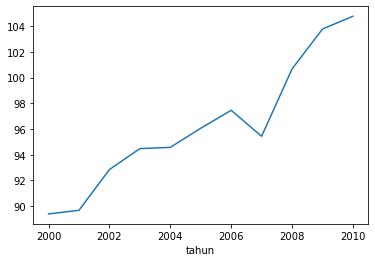

In [165]:
df_knicks_ptspertahun.plot()

# ganti style plot nya
https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html

In [166]:
mpl.style.use(['Solarize_Light2'])

<AxesSubplot:xlabel='tahun'>

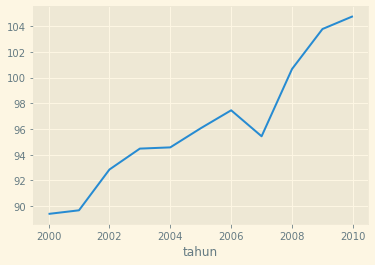

In [167]:
df_knicks_ptspertahun.plot()

# tambahkan label

Text(0.5, 0, 'tahun')

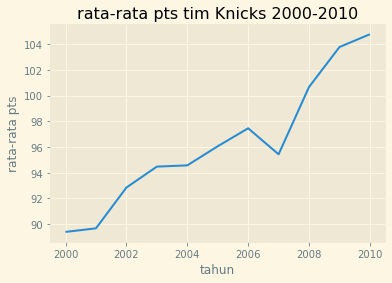

In [169]:
df_knicks_ptspertahun.plot()

plt.title("rata-rata pts tim Knicks 2000-2010")
plt.ylabel("rata-rata pts")
plt.xlabel("tahun")

# latihan
- coba cari data game team_id BOS lawan opp_id LAL di tahun 2000-2010
- hitung rata-rata pts dan rata-rata opp_pts per tahun
- buat plot nya